In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [89]:
#load data
dataset=pd.read_csv(r'C:\eigene Dateien\2_TA\Data_Analytics\data\210310_Project Analytics Input_R&D_Scores_v5c.csv', encoding="ISO-8859-1")
print(dataset.shape)
dataset.describe()


(34, 71)


,Input:,SoP Year,Months between QG9-QG2,NY volume TARGET,Average variable cost per unit T-JPY (Target),Average CM per unit T-JPY (Target),CM per Year,R&D Total LC EA,CapEx EA,NRE EA,...,Overall project QG traffic light Green? QG7,Overall project QG traffic light Green? QG4,Overall project QG traffic light Green? QG2,FC project QG traffic light Green? QG7,FC project QG traffic light Green? QG4,FC project QG traffic light Green? QG2,Procurement traficlight at QG3 Red?,Traffic light RD at QG4 Red?,Traffic light QM at QG2 Red?,Experience of PL
count,0.0,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,...,27.000000,17.000000,9.000000,24.000000,15.000000,9.000000,11.0,14.000000,9.0,26.000000
mean,NaN,2020.451613,33.548387,11255.774194,7367.935484,1718.903226,6.889860e+06,20.963871,5.678065,0.933226,...,0.074074,0.588235,0.111111,0.166667,0.200000,0.111111,0.0,0.071429,0.0,2.269231
std,NaN,1.588263,10.938735,14339.212330,6629.892000,2317.644844,7.681989e+06,24.283527,9.813472,1.711883,...,0.266880,0.939336,0.333333,0.380693,0.414039,0.333333,0.0,0.267261,0.0,0.777570
min,NaN,2017.000000,12.000000,100.000000,602.000000,0.000000,0.000000e+00,2.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
25%,NaN,2019.000000,24.500000,644.000000,2455.500000,311.000000,8.194295e+05,6.900000,1.100000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.000000
50%,NaN,2021.000000,35.000000,9036.000000,5235.000000,691.000000,3.868070e+06,10.700000,1.800000,0.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.000000
75%,NaN,2022.000000,41.000000,11754.500000,11041.500000,1916.000000,1.204764e+07,25.500000,5.200000,1.050000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.000000
max,NaN,2022.000000,56.000000,51495.000000,25712.000000,8928.000000,2.505360e+07,113.800000,50.000000,8.840000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,3.000000


In [90]:
#seperate features x and target y
#'NY volume TARGET'



y=dataset.iloc[:,9:12]
x=dataset.iloc[:,np.r_ [3:36,70]]
x2=dataset.iloc[:,np.r_ [4:10, 24:36,70]]
x3=dataset.iloc[:,np.r_ [9, 25:29,31:33]]

In [91]:
x.columns

Index(['SoP Year', 'Months between QG9-QG2', 'NY volume TARGET',
       'Average variable cost per unit T-JPY (Target)',
       'Average CM per unit T-JPY (Target)', 'CM per Year', 'R&D Total LC EA',
       'CapEx EA', 'NRE EA', 'Total funding LC EA', 'Legislation project',
       'Vehicle project', 'Component project', 'Vehicle & Comp. project',
       'LDT', 'MDT', 'HDT', 'LB', 'HB', 'IE', 'TA Classic?', 'Ext. Facelift',
       'Int. Facelift & Telematics', 'New E/E structure',
       'New Safety features/Safety regulation', 'New emission Standard',
       'Optional: other expected, significant funding drivers',
       'Ratio Legislation Funding', 'Scope of New & changed parts',
       'Technological Ambition', 'Variant Complexity', 'Number of Markets',
       'Organisational Complexity', 'Experience of PL'],
      dtype='object')

In [92]:
x2.columns

Index(['Months between QG9-QG2', 'NY volume TARGET',
       'Average variable cost per unit T-JPY (Target)',
       'Average CM per unit T-JPY (Target)', 'CM per Year', 'R&D Total LC EA',
       'Ext. Facelift', 'Int. Facelift & Telematics', 'New E/E structure',
       'New Safety features/Safety regulation', 'New emission Standard',
       'Optional: other expected, significant funding drivers',
       'Ratio Legislation Funding', 'Scope of New & changed parts',
       'Technological Ambition', 'Variant Complexity', 'Number of Markets',
       'Organisational Complexity', 'Experience of PL'],
      dtype='object')

In [93]:
x3.columns

Index(['R&D Total LC EA', 'Int. Facelift & Telematics', 'New E/E structure',
       'New Safety features/Safety regulation', 'New emission Standard',
       'Scope of New & changed parts', 'Technological Ambition'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

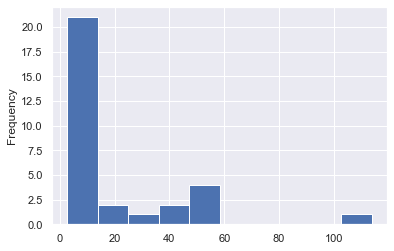

In [94]:
dataset ['R&D Total LC EA'].plot(kind='hist')

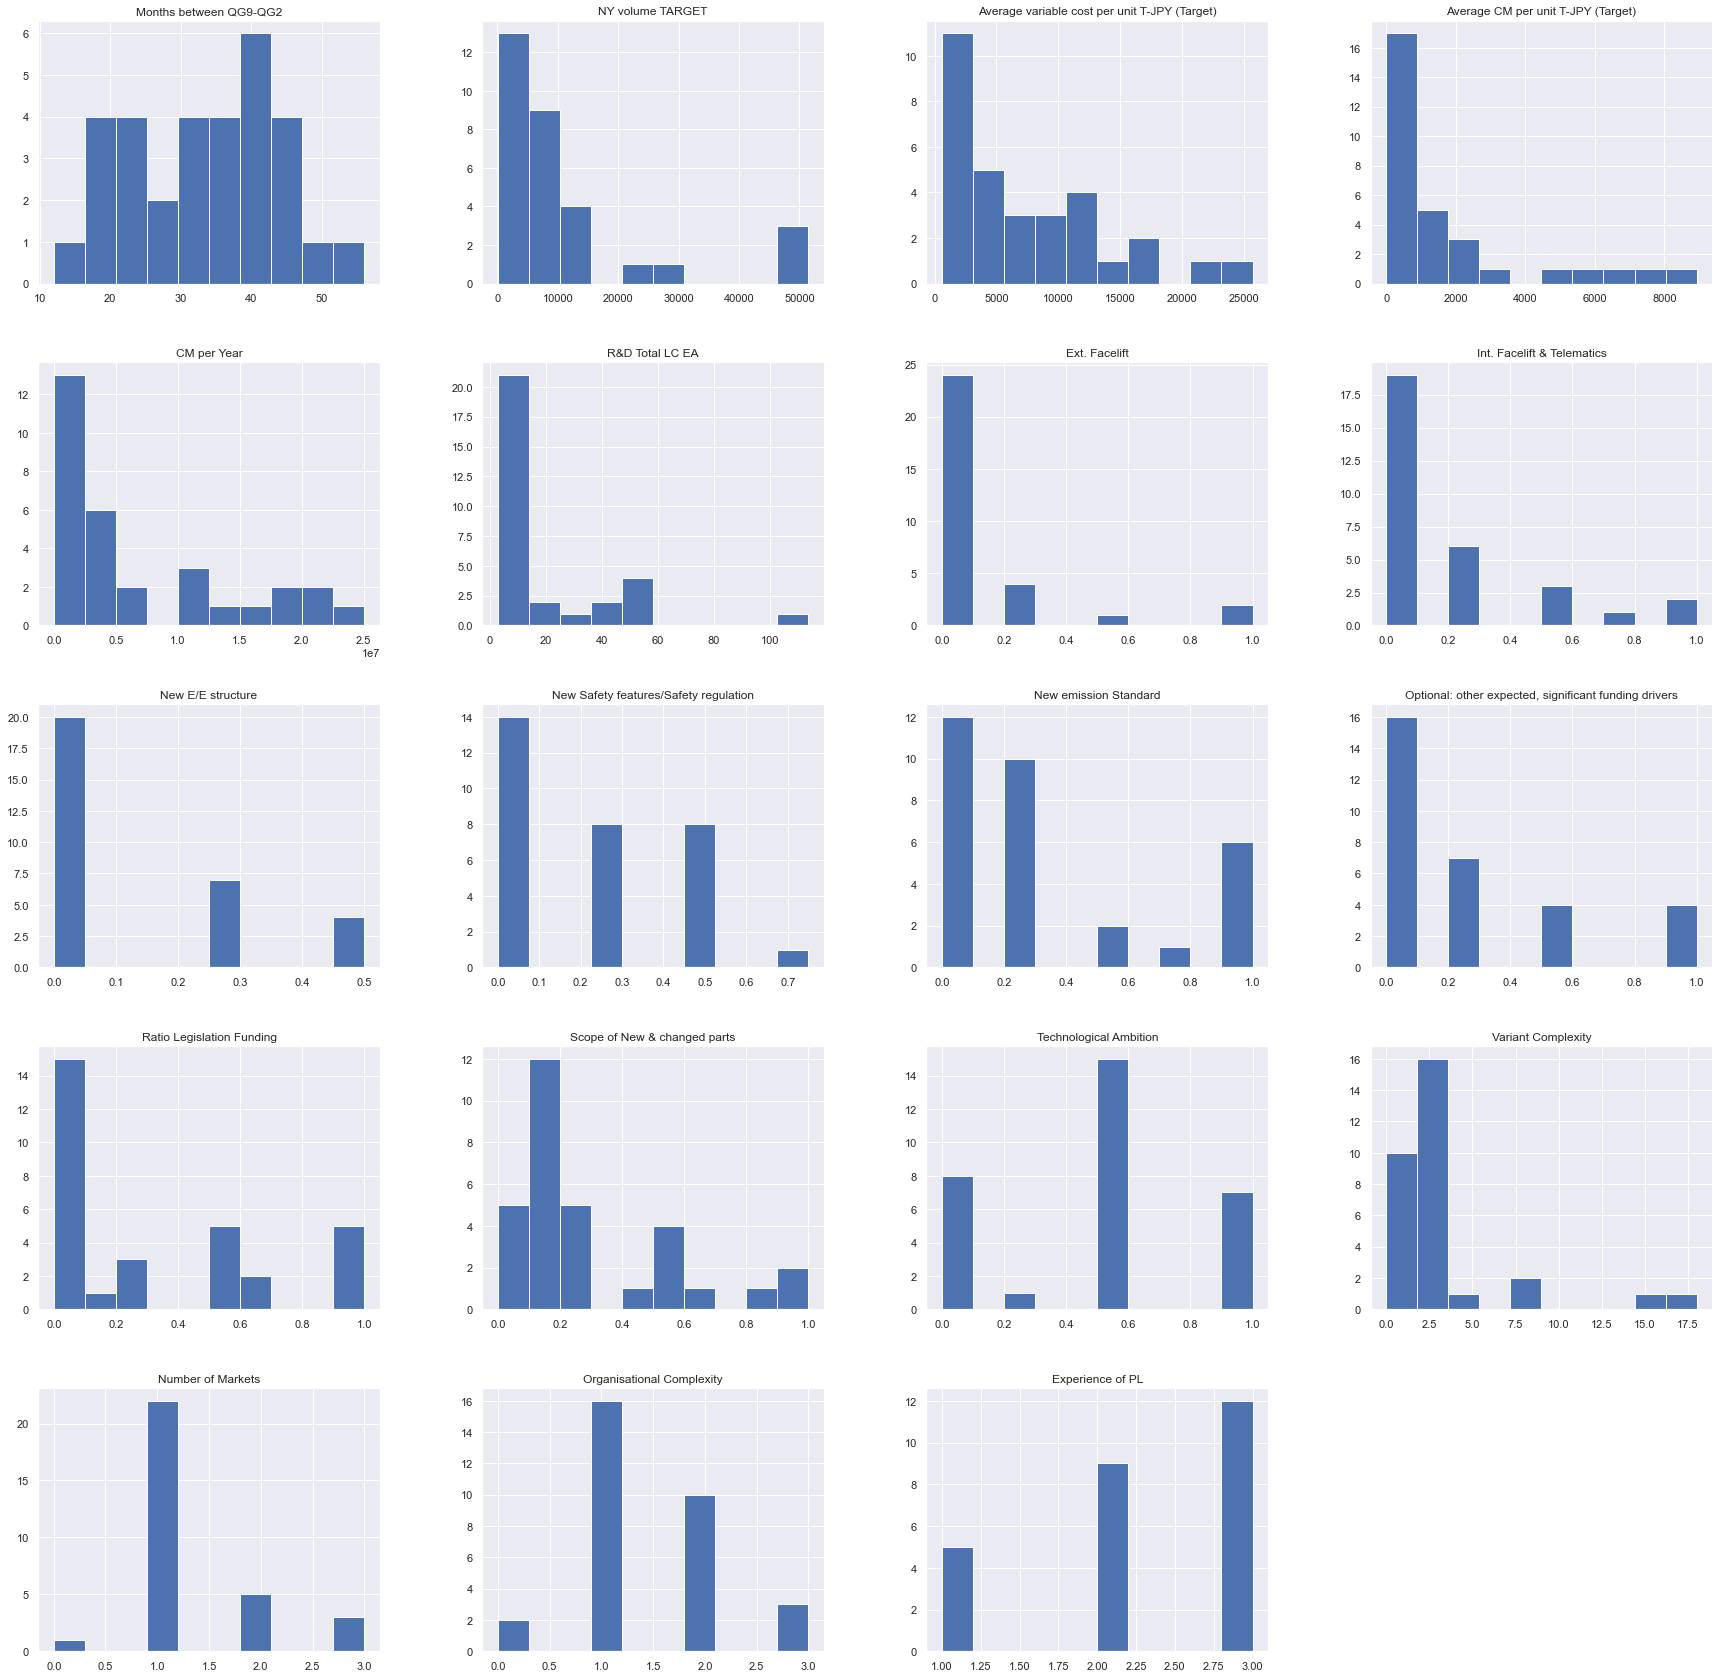

In [95]:


hp=x2.hist(bins=10, figsize=(30,30))
hp
plt.savefig('hist_plot_data_set.png')

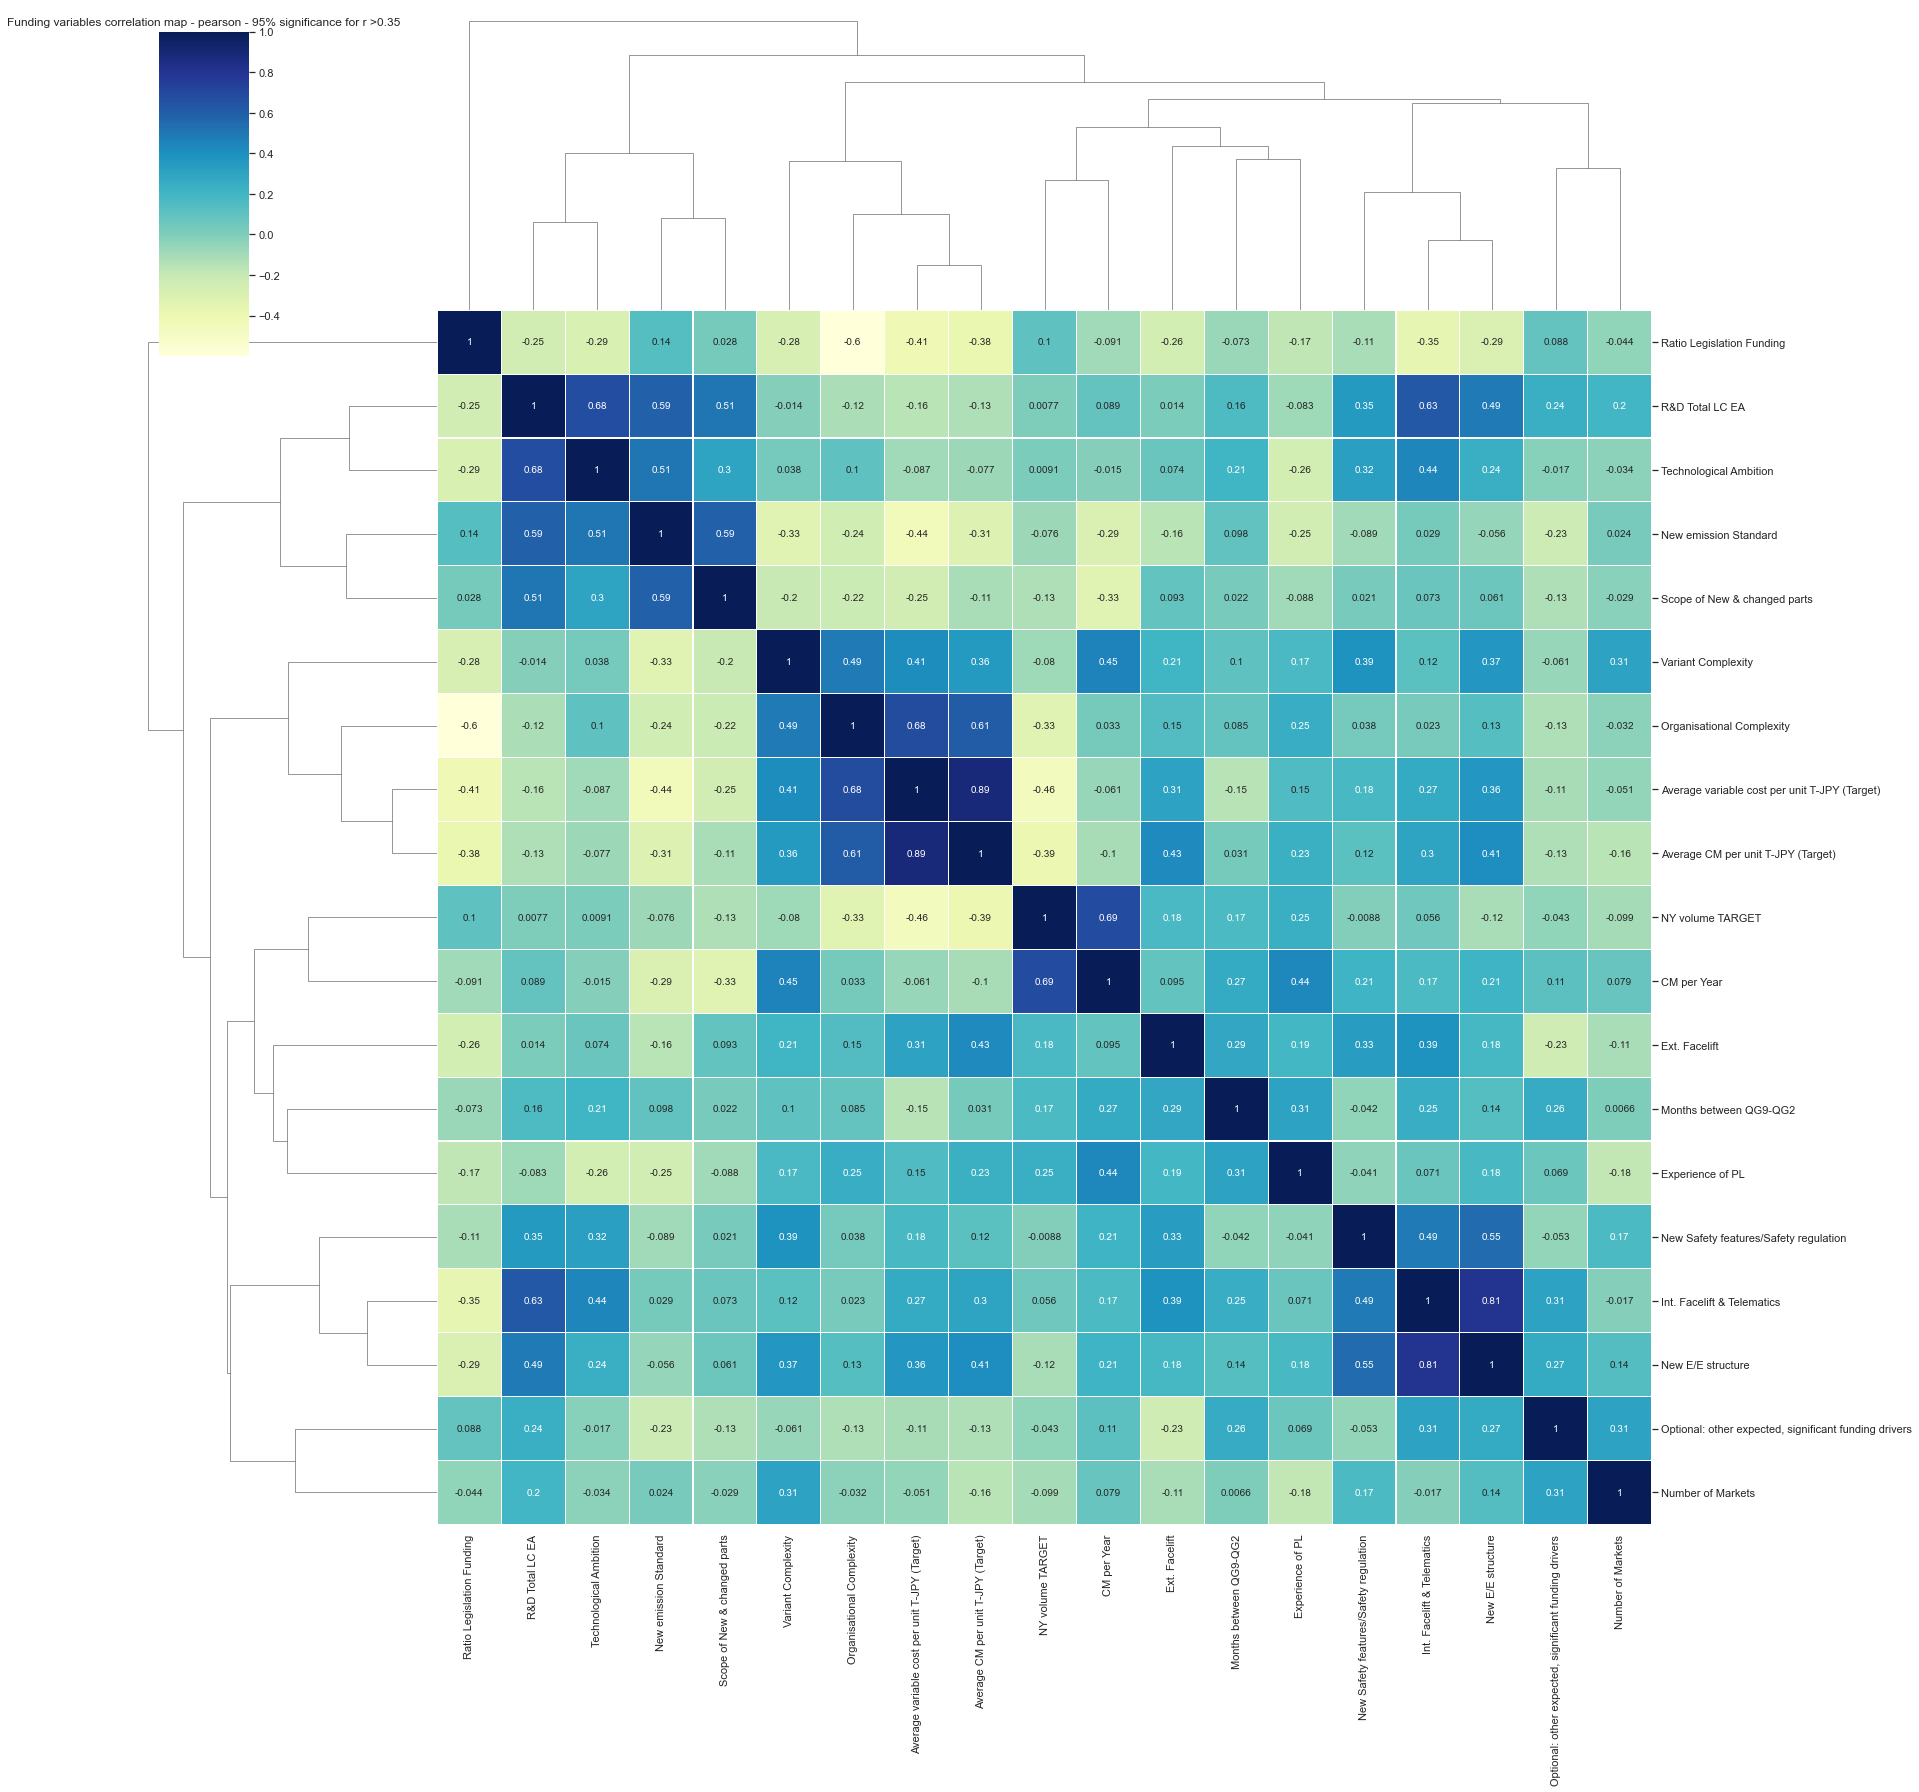

In [96]:
#correlation matrix. methods: 'spearman', 'pearson'. Number in box represents correlationfactor of respective method
corrmat = x2.corr(method='pearson')
cg = sns.clustermap(corrmat, cmap='YlGnBu', linewidths=0.1, annot=True, figsize=(25,25))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0 )
plt.title('Funding variables correlation map - pearson - 95% significance for r >0.35')
cg

In [97]:

cg.savefig('funding_predictor_correlation.png')

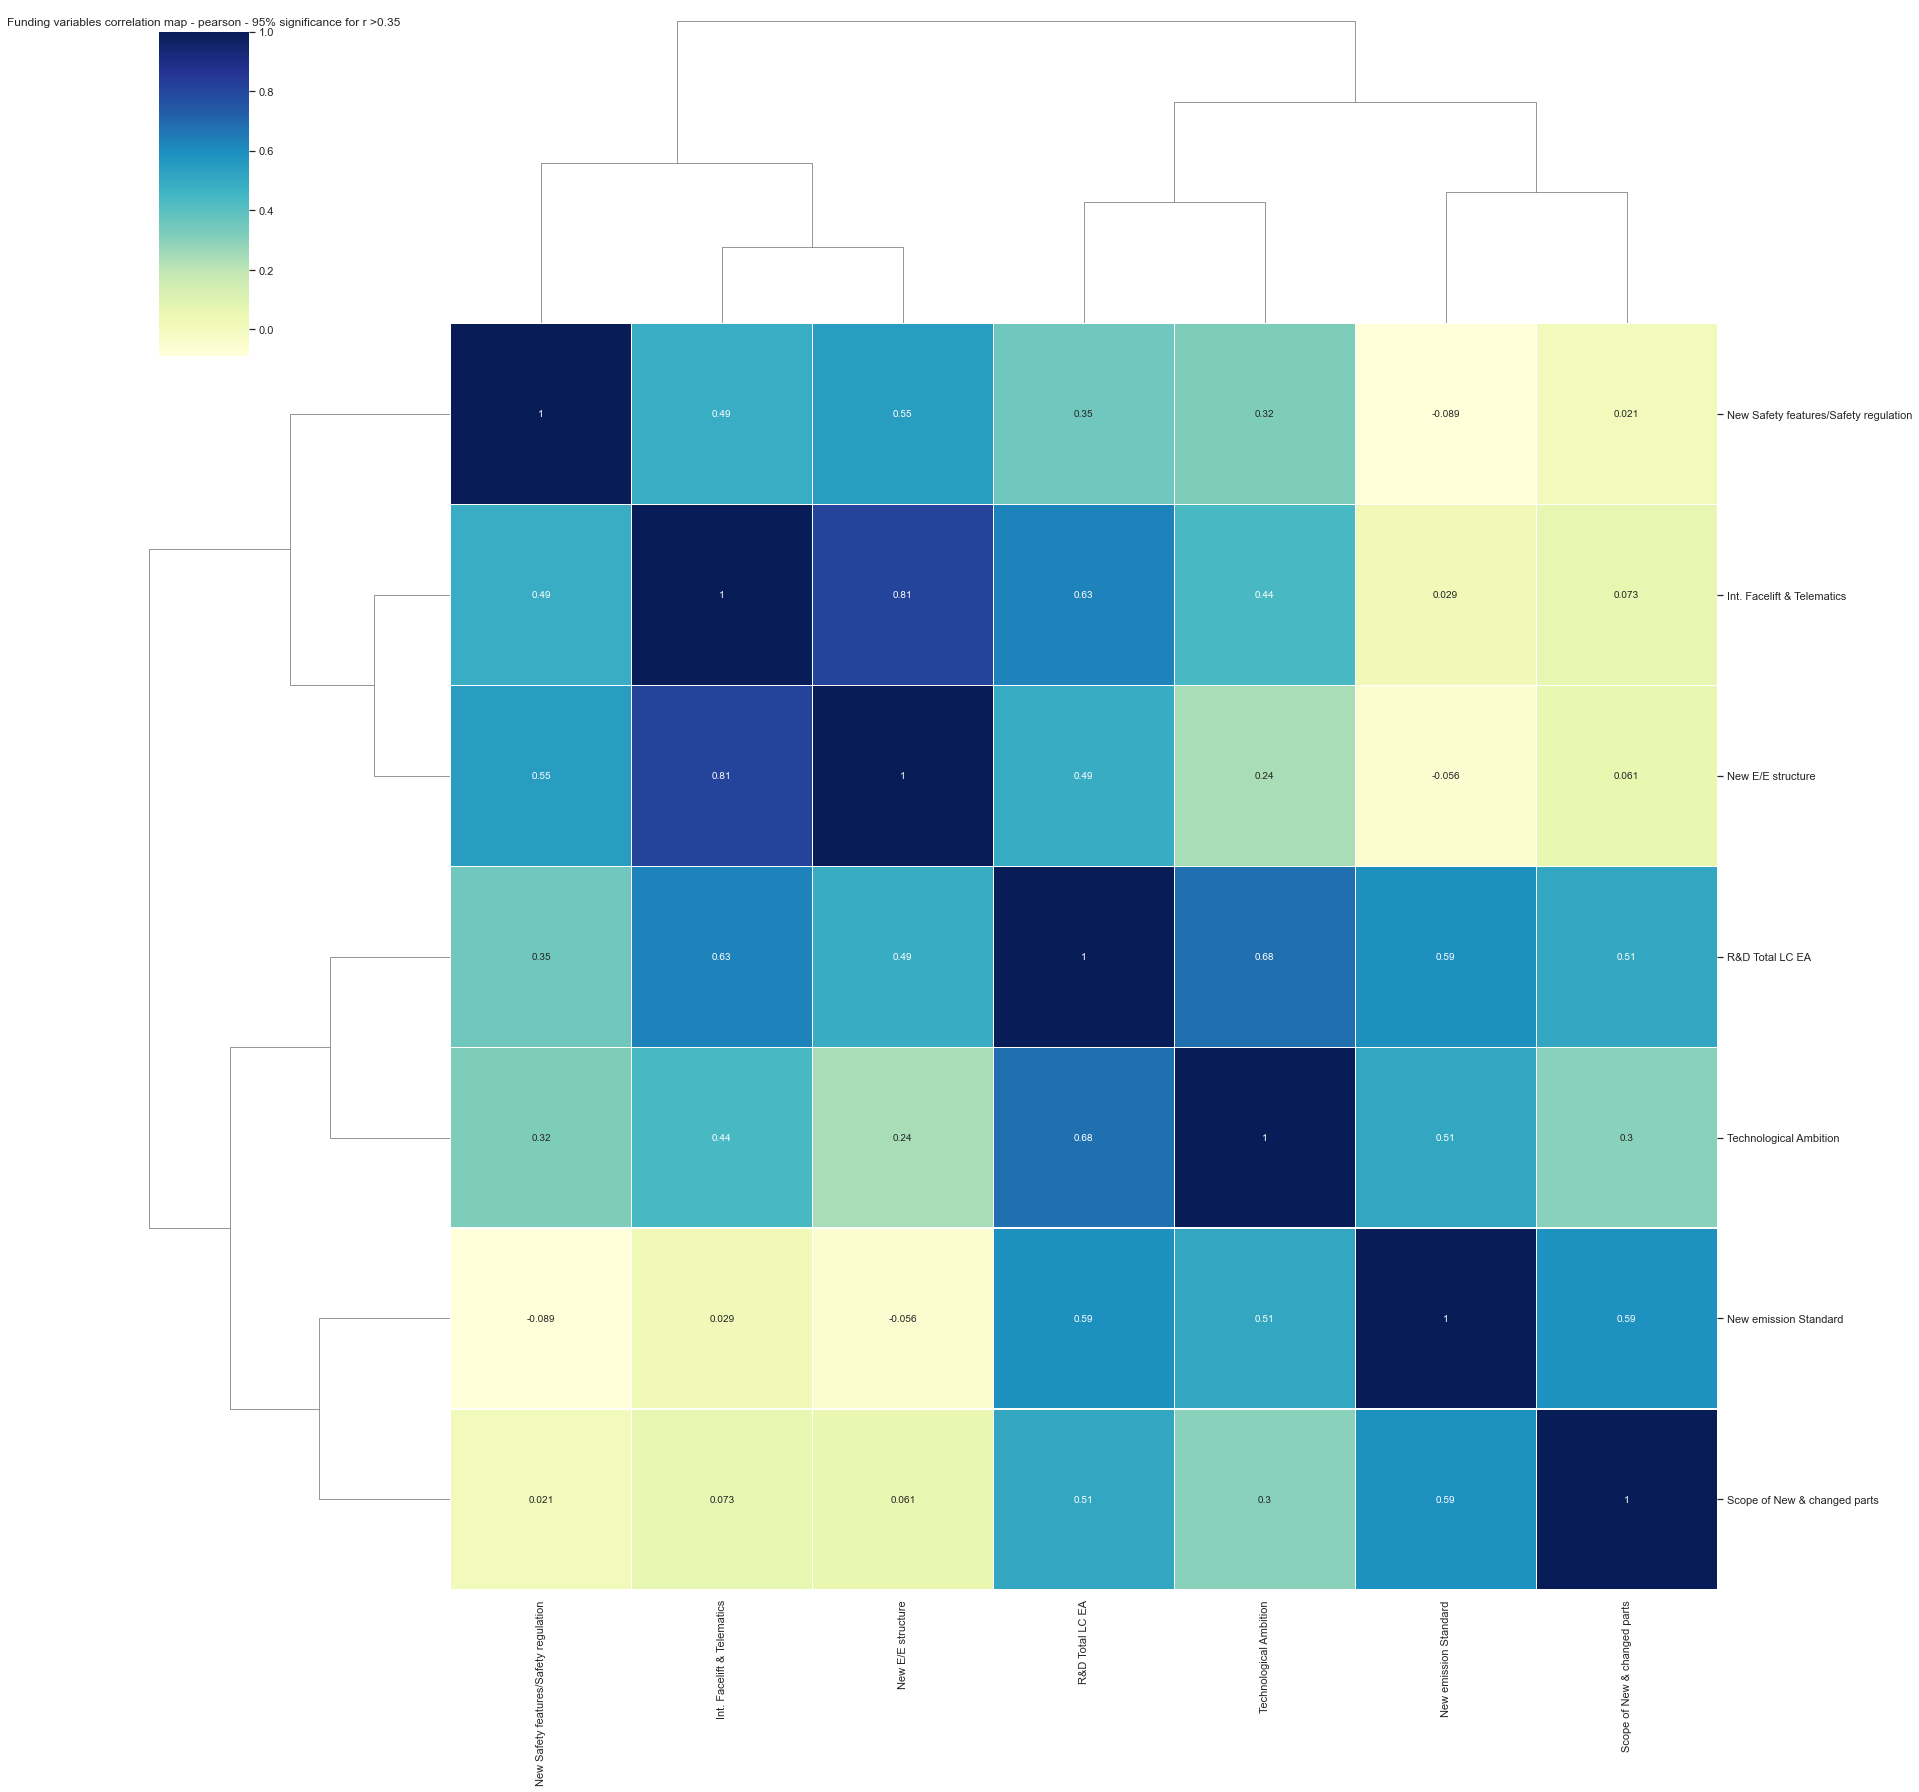

In [98]:
#correlation matrix. methods: 'spearman', 'pearson'. Number in box represents correlationfactor of respective method
corrmat = x3.corr(method='pearson')
cg = sns.clustermap(corrmat, cmap='YlGnBu', linewidths=0.1, annot=True, figsize=(25,25))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0 )
plt.title('Funding variables correlation map - pearson - 95% significance for r >0.35')
cg

In [99]:
cg.savefig('funding_predictor_correlation_best6.png')

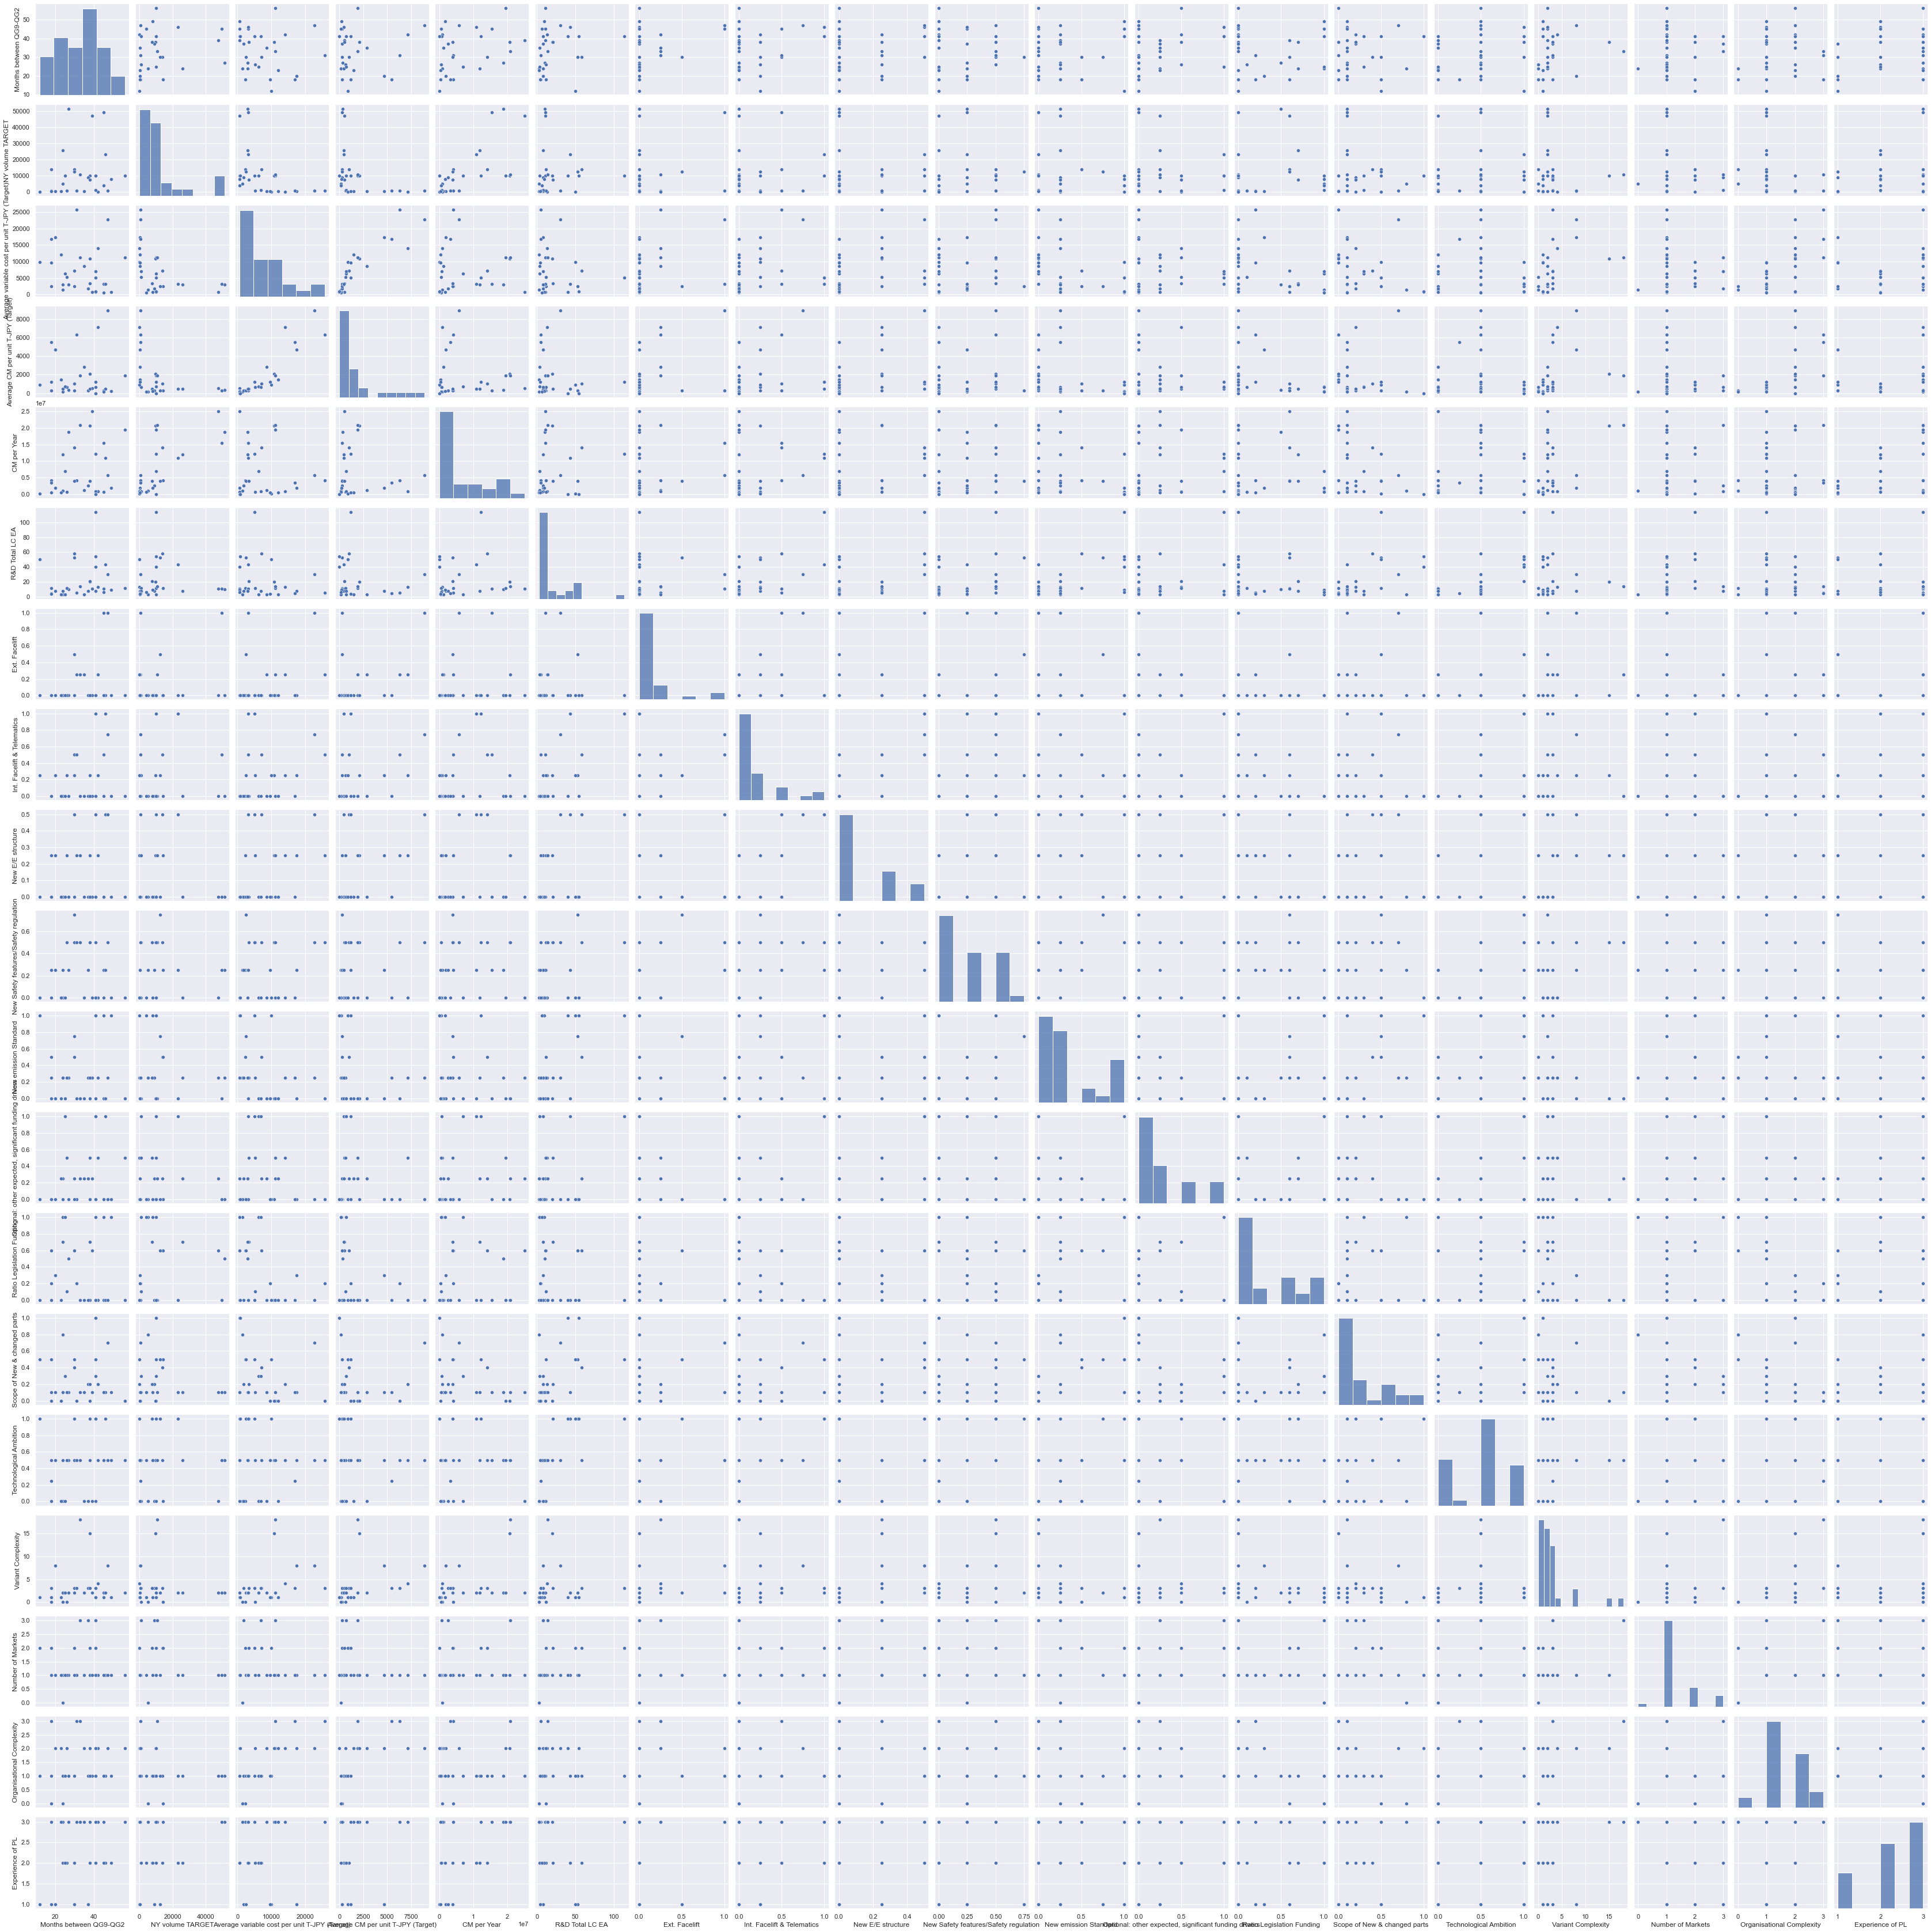

In [100]:
sns.set()
'''cols= ['R&D Total LC EA', 'CapEx EA', 'NRE EA', 'Ext. Facelift',
       'Int. Facelift & Telematics', 'New E/E structure',
       'New Safety features/Safety regulation', 'New emission Stand.',
       'Others significant features', 'Scope of New & changed parts',
       'Technological Ambition', 'Variant Complexity', 'Number of Markets',
       'Organisational Complexity', 'Experience of PL']
'''
sns.pairplot(x2,height=2.5)
plt.show()

C:\Users\jklinge\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Total LC EA', ylabel='Density'>

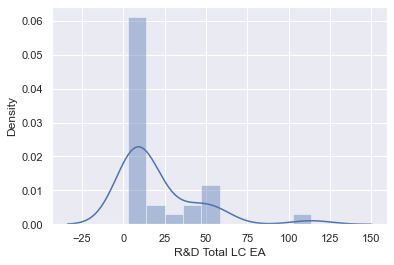

In [101]:
sns.distplot (dataset['R&D Total LC EA'])

C:\Users\jklinge\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Total LC EA', ylabel='Density'>

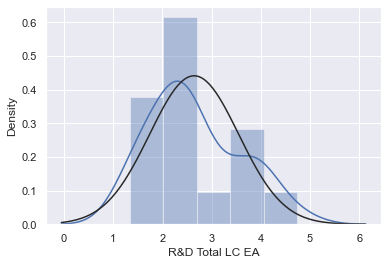

In [87]:
dataset['R&D Total LC EA']=np.log1p(dataset['R&D Total LC EA'])
sns.distplot(dataset['R&D Total LC EA'], fit=norm)